# Introduction

This notebook will explore the World Happiness Report data, part of the findings from the Gallup World Poll. A detailed explanation of the data can be found below:

The joy scores and rankings utilize information from the Gallup World Survey. The scores are based on answers to the most life evaluation address inquired within the survey. This address asks respondents to think of a scale with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a 0 and to rate their claim current lives on that scale. The columns taking after the bliss score assess the degree to which each of six variables – financial generation, social back, life anticipation, flexibility, nonattendance of debasement, and liberality – contribute to making life assessments higher in each nation than they are in Dystopia, a theoretical nation that has values rise to to the world’s least national midpoints for each of the six variables.

The Happiness Score is explained by the following factors:

- GDP per capita
- Healthy life expectancy
- Social support
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Residual error

The dataset we'll be using contains the Happiness Score for 153 countries along with the factors used to explain the score.


We will explore some visualizations to get a grasp of some trends in the data, then come up with our very own implementation of linear regression, using two different methods: the well-known gradient descent algorithm as well as solving the normal equations. Our implementation will only use relatively basic Python commands and common libraries such as NumPy and Pandas in order to carry out the necessary linear algebra operations. I will also include detailed step-by-step explanations throughout the code.

Linear regression is a linear approach to modeling the relationship between a response (or dependent variable) and one or more explanatory variables (or independent variables). The model can be explained as such: 

Suppose we have a data set of $m$ points $(\textbf{x}^{(1)}, y^{(1)}), (\textbf{x}^{(2)}, y^{(2)}), ..., (\textbf{x}^{(m)}, y^{(m)})$, where each $\textbf{x}^{(i)}$ is a vector of length $n$ of our explanatory variables. Then we have a matrix of explanatory variables $\textbf{X}$ and a vector of the response variable $\textbf{y}$. In linear regression, we are proposing a linear relationship between $\textbf{X}$ and $\textbf{y}$ as the predictive model for our data.

Essentially, the goal is to find a regression line $h_{\theta}(\textbf{X}) = {\theta_0} + {\theta_1}x_1 + {\theta_2}x_2 + ... + {\theta_n}x_n$ that best fits the distribution of our *m* data points, where $\textbf{x}$ is our input variable and ${\theta_0}, {\theta_1}, ..., {\theta_n}$ denote the coefficients of our regression line. We must find these coefficients ${\theta_0}, {\theta_1}, ..., {\theta_n}$ such that the mean square error (MSE) between the actual $y$ and the predicted value $h_{\theta}(\textbf{X})$ is as small as possible. That is, we want to minimize the value $$\frac{1}{2m}\displaystyle\sum_{i = 1}^m(h_{\theta}(\textbf{x}^{(i)})-y^{(i)})^2$$ for the m training examples $(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(m)}, y^{(m)})$. 

We will try to use our regression model to predict the happiness of a country based on the various aforementioned factors (economic status, amount of social support, perceptions of corruption, etc.) and explore some ways in which we can use our insights gathered from EDA to add to and improve our model in the future.

## Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression

# Loading the Data

In [2]:
# Load the data for 2020, leaving some unwanted columns out
wh_2020 = pd.read_csv('../data/World Happiness Data/2020.csv', usecols = range(12))

In [3]:
# Preview the data
wh_2020.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                      0.949172   -0.059482                   0.195445  
1                      0.951444    0.066202                   0.168489  
2                      0.921337    0.105911                   0.303728  
3                      0.948892    0.246944                   0.711710  
4                      0.955750    0.134533                   0.263218

In [4]:
print("Our data has {} rows (countries) and {} columns.".format(wh_2020.shape[0], wh_2020.shape[1]))

Our data has 153 rows (countries) and 12 columns.


In [5]:
# Quick summary statistics
wh_2020.describe()

Ladder score  Standard error of ladder score  upperwhisker  \
count     153.00000                      153.000000    153.000000   
mean        5.47324                        0.053538      5.578175   
std         1.11227                        0.018183      1.096823   
min         2.56690                        0.025902      2.628270   
25%         4.72410                        0.040698      4.826248   
50%         5.51500                        0.050606      5.607728   
75%         6.22850                        0.060677      6.363886   
max         7.80870                        0.120590      7.869766   

       lowerwhisker  Logged GDP per capita  Social support  \
count    153.000000             153.000000      153.000000   
mean       5.368304               9.295706        0.808721   
std        1.128631               1.201588        0.121453   
min        2.505530               6.492642        0.319460   
25%        4.603149               8.350645        0.737217   
50%        5.430644               9.456313        0.829204   
75%        6.138881              10.265124        0.906747   
max        7.747634              11.450681        0.974670   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               153.000000                    153.000000  153.000000   
mean                 64.445529                      0.783360   -0.014568   
std                   7.057848                      0.117786    0.151809   
min                  45.200001                      0.396573   -0.300907   
25%                  58.961712                      0.714839   -0.127015   
50%                  66.305145                      0.799805   -0.033665   
75%                  69.289192                      0.877709    0.085429   
max                  76.804581                      0.974998    0.560664   

       Perceptions of corruption  
count                 153.000000  
mean                    0.733120  
std                     0.175172  
min                     0.109784  
25%                     0.683019  
50%                     0.783122  
75%                     0.849151  
max                     0.935585

# Cleaning + Modifying the Data

## Renaming Columns

Some of the column names from the original dataset are quite messy, so let's change them to more manageable names here.

In [6]:
col_names_dict = {'Country name':'Country', 'Regional indicator':'Region', 'Ladder score': 'Ladder',
                  'Standard error of ladder score':'Standard Error', 'Logged GDP per capita':'Logged GDPPC',
                  'Social support':'Social Support', 'Healthy life expectancy':'Life Expectancy',
                  'Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Corruption'}

wh_2020.rename(columns = col_names_dict, inplace = True)

## Missing Values

In [7]:
# Check for any missing values in the data
wh_2020.isnull().sum()

Country            0
Region             0
Ladder             0
Standard Error     0
upperwhisker       0
lowerwhisker       0
Logged GDPPC       0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

No missing values in the data, so we can move straight on!

## Adding "Rank" and "Quartile" Columns

In [8]:
# Add a 'Rank' column to our data (luckily for us, the rows are already ordered from happiest to unhappiest)
wh_2020['Rank'] = range(1, 154)

Later on, we may find it useful to have the countries split up into percentiles. Let's create a 'Quartile' column that denotes the quartile each country belongs to according to its overall happiness score/rank.

In [9]:
quartile_index = np.percentile(wh_2020['Rank'], [25, 50, 75])
quartiles = pd.Series(wh_2020['Rank'].map(lambda x:(np.searchsorted(quartile_index, x) + 1)), name = 'Quartile')
wh_2020 = pd.concat([wh_2020, quartiles], axis = 1)    

In [10]:
# Check our updated data with the new 'Rank' and 'Quartile' columns
wh_2020.head()

Country          Region  Ladder  Standard Error  upperwhisker  \
0      Finland  Western Europe  7.8087        0.031156      7.869766   
1      Denmark  Western Europe  7.6456        0.033492      7.711245   
2  Switzerland  Western Europe  7.5599        0.035014      7.628528   
3      Iceland  Western Europe  7.5045        0.059616      7.621347   
4       Norway  Western Europe  7.4880        0.034837      7.556281   

   lowerwhisker  Logged GDPPC  Social Support  Life Expectancy   Freedom  \
0      7.747634     10.639267        0.954330        71.900825  0.949172   
1      7.579955     10.774001        0.955991        72.402504  0.951444   
2      7.491272     10.979933        0.942847        74.102448  0.921337   
3      7.387653     10.772559        0.974670        73.000000  0.948892   
4      7.419719     11.087804        0.952487        73.200783  0.955750   

   Generosity  Corruption  Rank  Quartile  
0   -0.059482    0.195445     1         1  
1    0.066202    0.168489     2         1  
2    0.105911    0.303728     3         1  
3    0.246944    0.711710     4         1  
4    0.134533    0.263218     5         1

# Visualizations

In [11]:
# Set plot style parameters for ensuing plots
plt.style.use('fivethirtyeight')
sns.set_palette('deep')

plt.rc('font', family = 'Tahoma')
plt.rc('axes', labelsize = 20)
plt.rc('axes', titlesize = 28)
plt.rc('figure', titlesize = 28)
plt.rc('font', size = 14)
plt.rc('axes', labelsize = 20)
plt.rc('legend', fontsize = 18)
plt.rc('axes', titlesize = 28)

## Barplot/Countplot

Let's first quickly see how countries are distributed by region and how happiness differs among the different regions to see if there are any region-specific trends we can pick up on:

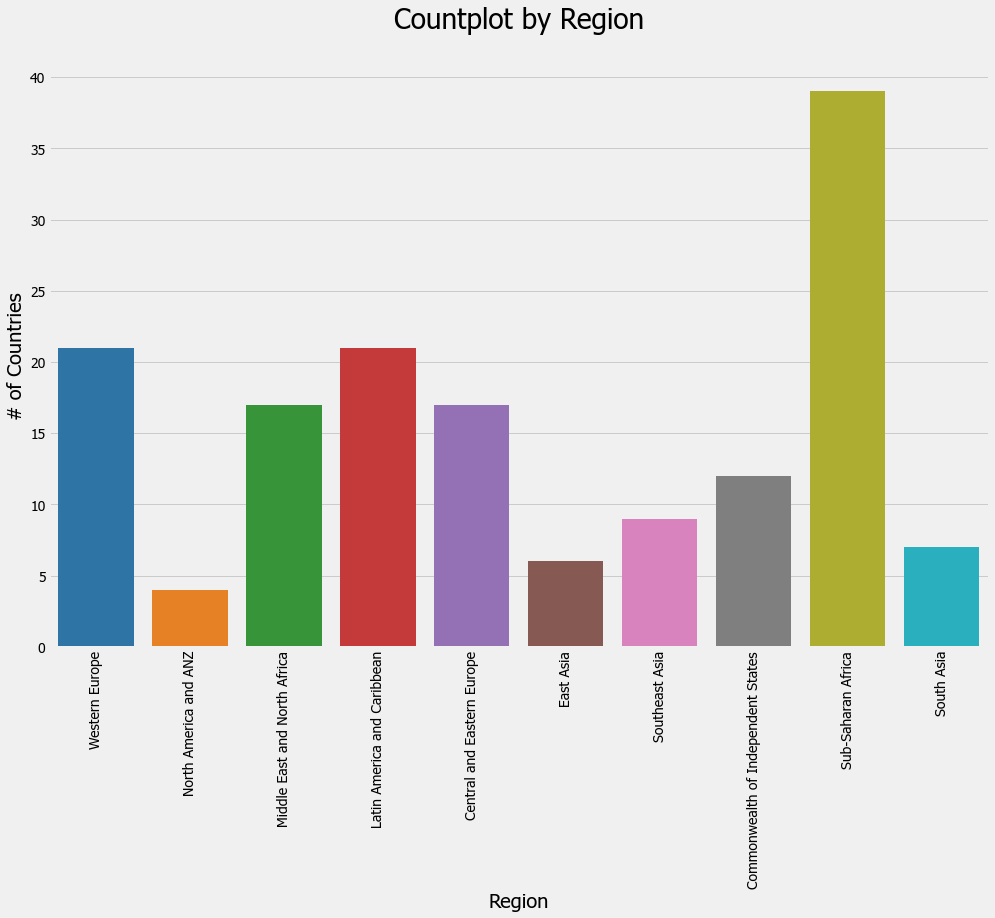

In [12]:
fig, ax = plt.subplots(figsize = (15, 10))

ax = sns.countplot(x = 'Region', data = wh_2020, saturation = 0.8, palette = 'tab10')
ax.set_xlabel('Region')
ax.set_ylabel('# of Countries')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title("Countplot by Region", y = 1.05);

## Stacked Barplot/Countplot

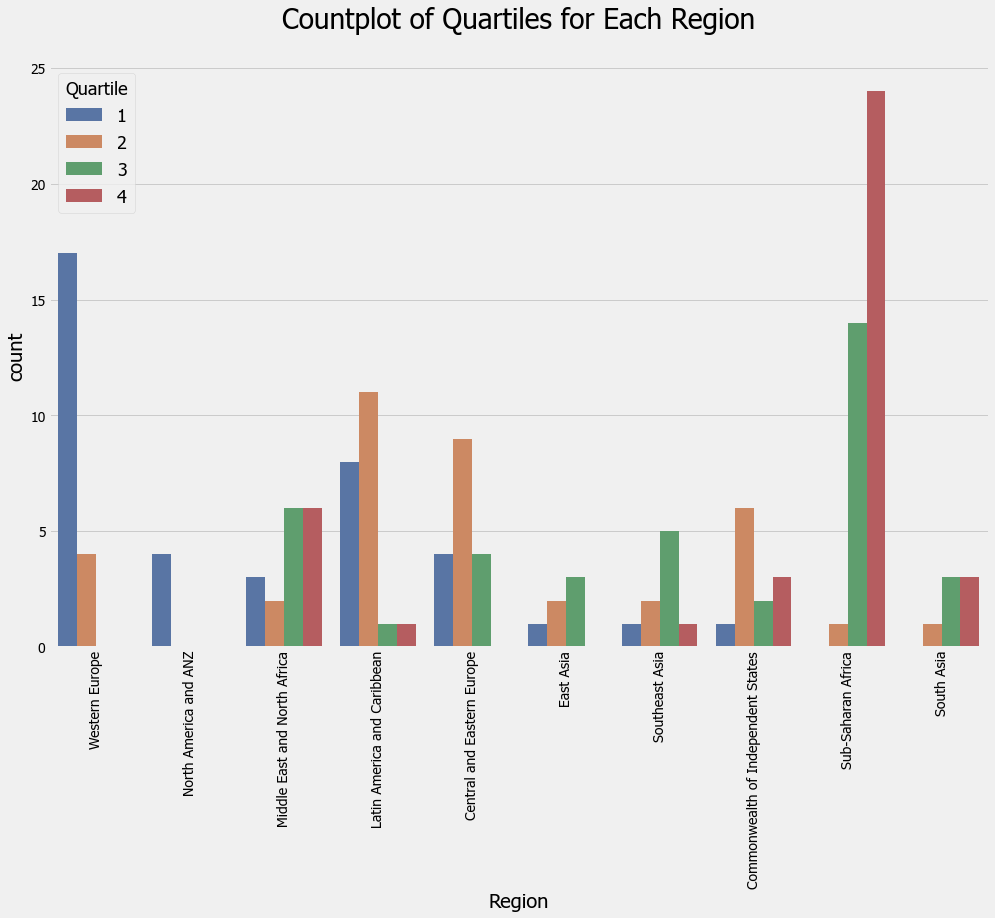

In [13]:
fig, ax = plt.subplots(figsize = (15, 10))

ax = sns.countplot(x = 'Region', data = wh_2020, hue = 'Quartile')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title("Countplot of Quartiles for Each Region", y = 1.05);
ax.legend(loc = "upper left", frameon = True, title = 'Quartile', title_fontsize = 18);

We can illustrate these differences by region more succinctly with the following:

In [14]:
print("Table of Average Rank for Each Region:\n")
print(wh_2020.groupby('Region')['Rank'].agg('mean'))

Table of Average Rank for Each Region:

Region
Central and Eastern Europe             58.294118
Commonwealth of Independent States     82.583333
East Asia                              66.833333
Latin America and Caribbean            52.380952
Middle East and North Africa           89.117647
North America and ANZ                  12.250000
South Asia                            111.285714
Southeast Asia                         81.000000
Sub-Saharan Africa                    121.871795
Western Europe                         22.523810
Name: Rank, dtype: float64


There a couple of pretty clear patterns we can see here. For example, Western Europe, North America, and Latin America all seem to be places where the reported happiness is quite high, whereas places like South Asia and Sub-Saharan Africa appear to be quite unhappy.

## Pairplots

Let's now take a look at the relationship between some of the relevant factors (GDP per capita, healthy life expectancy, social support,etc.) with a pairplot from Seaborn.

In [15]:
# Gather columns corresponding to the six measured values (Logged GDP per capita, social support, etc.)
feature_cols = ['Logged GDPPC', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']

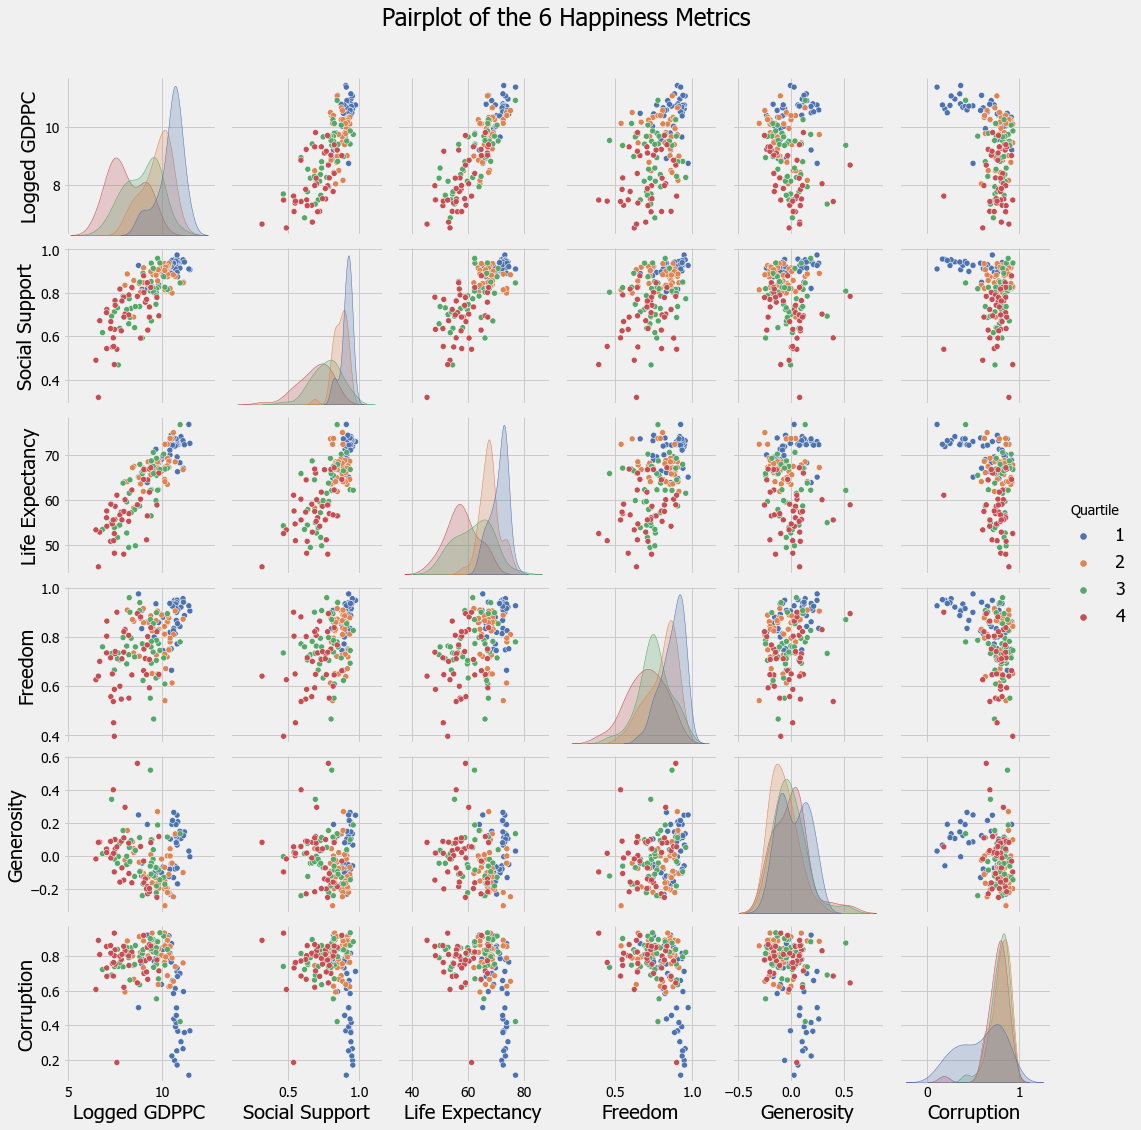

In [16]:
pairplot = sns.pairplot(wh_2020, hue = 'Quartile', vars = feature_cols, corner = False, palette = 'deep')
pairplot.fig.suptitle("Pairplot of the 6 Happiness Metrics", fontsize = 24, y = 1.05);

In some metrics, we can see a stark difference between countries in the first quartile versus countries in the other quartiles (especially 'Corruption'). On the other hand, other measurements seem to be much less relevant in distinguishing happier countries from the rest (look at 'Generosity')

## Correlation Matrix

Let's now closely look at the relationships between each of the six measured values (Logged GDP per capita, social support, etc.) *and* the overall ladder score to perhaps highlight which features may be more/less important to a country's overall happiness.

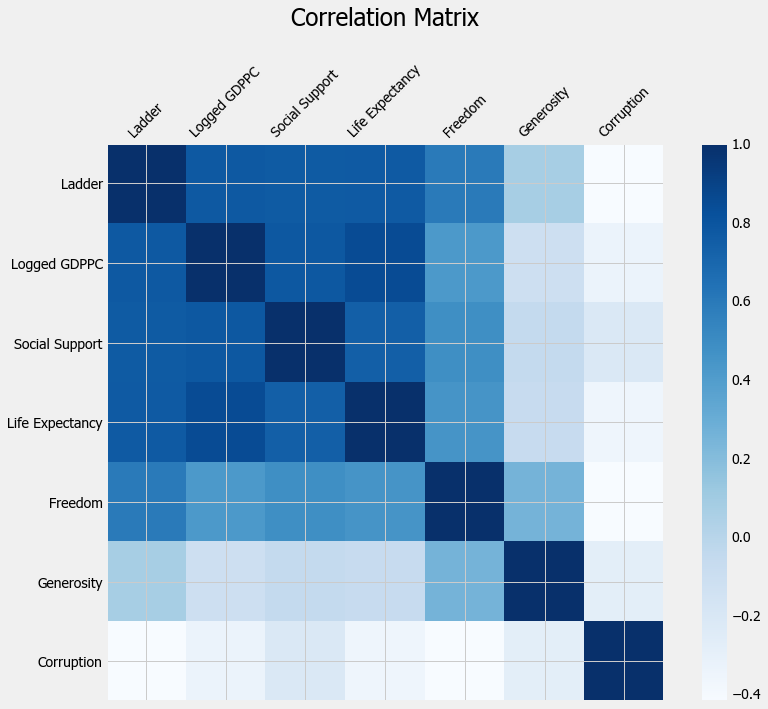

In [17]:
df = pd.concat([wh_2020['Ladder'], wh_2020[feature_cols]], axis = 1)

fig = plt.figure(figsize = (13, 10))

plt.matshow(df.corr(), fignum = fig.number, cmap = 'Blues')
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize = 24, y = 1.2);

It looks like the Logged GDPPC, Social Support, and Life Expectancy metrics all have a relatively high correlation with the overall score a country received. Also, these factors each seem to have a pretty high correlation with each other (e.g., Social Support is well correlated with Life Expectancy, and so on). On the other end of the spectrum, Generosity does not seem to have a sizeable correlation with any other measurement, including the Ladder score.

## Line Plots

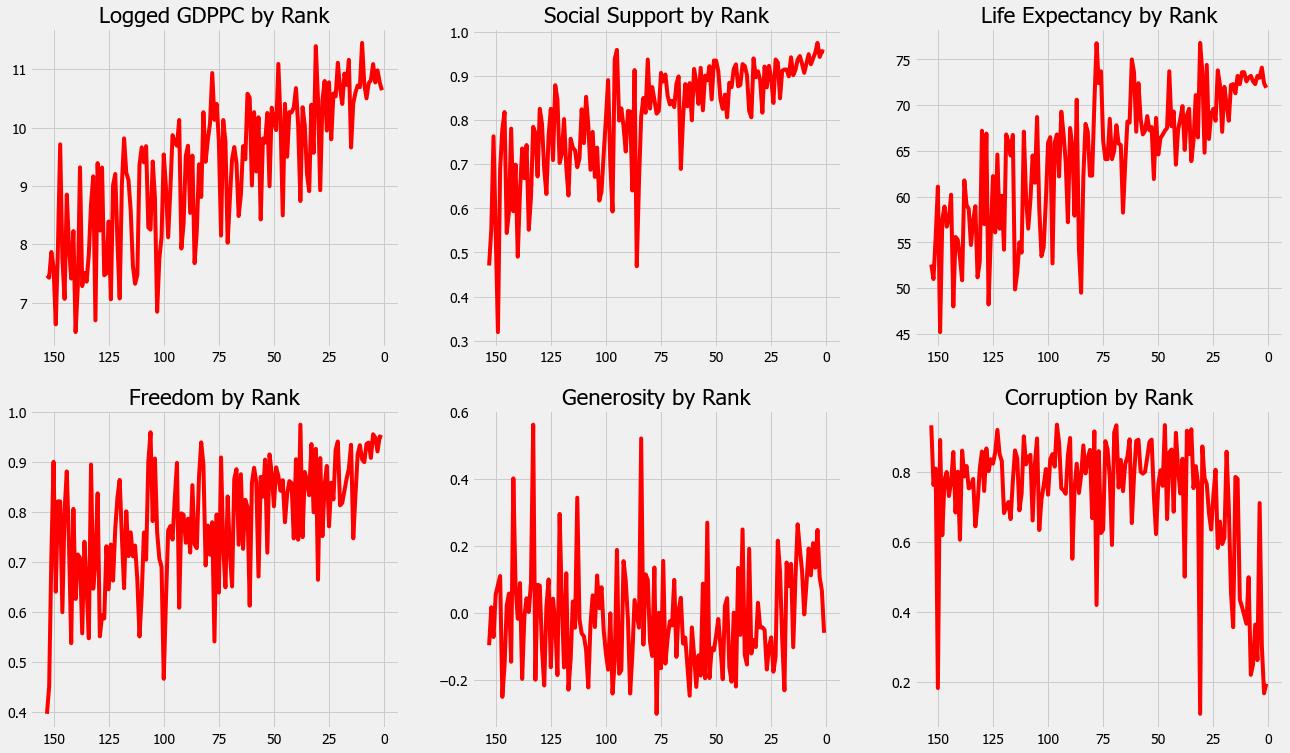

In [18]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

for i, ax in enumerate(axes.flat):
    ax.plot(wh_2020['Rank'], wh_2020[feature_cols[i]], color = 'red')
    ax.set_title(feature_cols[i] + ' by Rank', fontsize = 22)
    ax.set_xlim(153, 1)
    ax.axis('tight')

As we may have expected, the plots involving variables with a higher correlation (namely the top row of plots) with overall score/ranking display a linear trend as we go from lower to higher ranked countries. The last two plots (which portray variables with low correlation), on the other hand, are fairly "noisy" and don't display a very clear linear relationship.

## A Multi-Dimensional Scatterplot

Let's take our three most indicative/"valuable" variables and create a multidimensional analysis of a country's score in these 3 measurements and quartile.

In [19]:
plt.figure(figsize = (20, 14))

fig = px.scatter(wh_2020, x = 'Logged GDPPC', y = 'Social Support', hover_data = [wh_2020['Country']], size = 'Life Expectancy', color = wh_2020['Quartile'].astype('string'))
fig.update_layout(title_text = "GDP, Social Support, and Life Expectancy by Quartile", title_x = 0.5, xaxis_title = 'Logged GDPPC', yaxis_title = 'Social Support', legend_title = 'Quartile')

fig.show();

<Figure size 1440x1008 with 0 Axes>

In the above plot, we have Logged GDPPC on the x-axis, Social Support on the y-axis, and the size of the dots corresponding to Life Expectancy. It can be inferred from the plot that the higher quartiles tend to have higher measurements in all three of these features. This bodes well for building a linear regression model to predict a country's happiness score. We have observed clear linear relationships between variables, which means we can move forward with the next part of this notebook.

# Implementing Linear Regression

Now, let's try to build ourselves a regression model to predict the happiness score for each country given the 6 measured values: 
* Logged GDPPC
* Social Support
* Life Expectancy
* Freedom
* Generosity
* Corruption

In [20]:
wh_2020.head()

Country          Region  Ladder  Standard Error  upperwhisker  \
0      Finland  Western Europe  7.8087        0.031156      7.869766   
1      Denmark  Western Europe  7.6456        0.033492      7.711245   
2  Switzerland  Western Europe  7.5599        0.035014      7.628528   
3      Iceland  Western Europe  7.5045        0.059616      7.621347   
4       Norway  Western Europe  7.4880        0.034837      7.556281   

   lowerwhisker  Logged GDPPC  Social Support  Life Expectancy   Freedom  \
0      7.747634     10.639267        0.954330        71.900825  0.949172   
1      7.579955     10.774001        0.955991        72.402504  0.951444   
2      7.491272     10.979933        0.942847        74.102448  0.921337   
3      7.387653     10.772559        0.974670        73.000000  0.948892   
4      7.419719     11.087804        0.952487        73.200783  0.955750   

   Generosity  Corruption  Rank  Quartile  
0   -0.059482    0.195445     1         1  
1    0.066202    0.168489     2         1  
2    0.105911    0.303728     3         1  
3    0.246944    0.711710     4         1  
4    0.134533    0.263218     5         1

In [21]:
wh_2020.columns

Index(['Country', 'Region', 'Ladder', 'Standard Error', 'upperwhisker',
       'lowerwhisker', 'Logged GDPPC', 'Social Support', 'Life Expectancy',
       'Freedom', 'Generosity', 'Corruption', 'Rank', 'Quartile'],
      dtype='object')

## Feature Scaling

Before we can start implementing our very own linear regression algorithm, we need to consider an important preprocessing step: feature scaling. Often when building a model (when performing principal component analysis, in our particular case), we need all of our stat totals to be scaled to have a mean of 0 and a standard deviation of 1 so that the model does not over- or underweight any variables drastically. For many machine learning algorithms, it is good practice to scale/standardize features so that the model performs better and more efficiently.

In [22]:
cols_to_scale = ['Logged GDPPC', 'Life Expectancy']

scaler = StandardScaler(copy = False)
wh_2020_scaled = wh_2020.copy()
wh_2020_scaled[cols_to_scale] = scaler.fit_transform(wh_2020[cols_to_scale])

wh_2020_scaled.head()

Country          Region  Ladder  Standard Error  upperwhisker  \
0      Finland  Western Europe  7.8087        0.031156      7.869766   
1      Denmark  Western Europe  7.6456        0.033492      7.711245   
2  Switzerland  Western Europe  7.5599        0.035014      7.628528   
3      Iceland  Western Europe  7.5045        0.059616      7.621347   
4       Norway  Western Europe  7.4880        0.034837      7.556281   

   lowerwhisker  Logged GDPPC  Social Support  Life Expectancy   Freedom  \
0      7.747634      1.121827        0.954330         1.059782  0.949172   
1      7.579955      1.234325        0.955991         1.131096  0.951444   
2      7.491272      1.406271        0.942847         1.372746  0.921337   
3      7.387653      1.233121        0.974670         1.216031  0.948892   
4      7.419719      1.496340        0.952487         1.244573  0.955750   

   Generosity  Corruption  Rank  Quartile  
0   -0.059482    0.195445     1         1  
1    0.066202    0.168489     2         1  
2    0.105911    0.303728     3         1  
3    0.246944    0.711710     4         1  
4    0.134533    0.263218     5         1

## The Parameters

First, let's quickly review our necessary parameters (discussed in Introduction):

- $\textbf{X}$ is the feature(s) vector/matrix
- $\textbf{y}$ is the target variable
- $\boldsymbol{\theta}$ is the vector consisting of the parameters of the linear regression equation
- m represents the total number of observations in our data
- n is the number of features used to make our prediction

In [23]:
# Designate features and target variable
y = wh_2020_scaled['Ladder']
X = wh_2020_scaled[feature_cols]

In [24]:
m = X.shape[0]
n = X.shape[1]

In [25]:
# Initialize theta as a length (n+1) vector of zeros
theta = np.zeros((n+1, ))

In [26]:
theta

array([0., 0., 0., 0., 0., 0., 0.])

## Hypothesis and Cost Functions

First, we will define our hypothesis function ${h_{\theta}}(\textbf{X})$ and cost function $J(\boldsymbol{\theta})$, which we will use as helper functions in our big linreg function at the end.

In [27]:
# Hypothesis function
def h(X, theta):
    return np.dot(X, theta)

In [28]:
# Mean squared error cost function
def J(theta):
    return np.sum(np.square((h(X, theta) - y))) / (2*m)

## Gradient Descent

Now, we must find a way to solve for the best theta parameters for our model. In this section, we will do so by incorporating the gradient descent algorithm. This algorithm is given by the following:

<img src="gradient_descent_image.png">

for coefficients ${\theta_0}, {\theta_1}, ..., {\theta_n}$ where all of the coefficients are updated simultaneously.

In [29]:
def gradient_descent(X, theta, y, alpha = 0.05, iterations = 100):
    for i in range(iterations):
        prediction = h(X, theta)
        gradient = np.dot((prediction - y), X)
        theta = theta - (alpha*(1/m)*gradient)
    return theta

In [30]:
# Creating the design matrix X
X = pd.concat([pd.DataFrame(np.ones((m, 1)), columns = ['x_0']), X], axis = 1)
X

x_0  Logged GDPPC  Social Support  Life Expectancy   Freedom  Generosity  \
0    1.0      1.121827        0.954330         1.059782  0.949172   -0.059482   
1    1.0      1.234325        0.955991         1.131096  0.951444    0.066202   
2    1.0      1.406271        0.942847         1.372746  0.921337    0.105911   
3    1.0      1.233121        0.974670         1.216031  0.948892    0.246944   
4    1.0      1.496340        0.952487         1.244573  0.955750    0.134533   
..   ...           ...             ...              ...       ...         ...   
148  1.0     -2.229813        0.319460        -2.735782  0.640881    0.082410   
149  1.0     -1.415768        0.540835        -0.475736  0.900589    0.055484   
150  1.0     -1.193995        0.763093        -1.254952  0.711458   -0.072064   
151  1.0     -1.561674        0.553707        -1.911303  0.451314    0.016519   
152  1.0     -1.530362        0.470367        -1.685282  0.396573   -0.096429   

     Corruption  
0      0.195445  
1      0.168489  
2      0.303728  
3      0.711710  
4      0.263218  
..          ...  
148    0.891807  
149    0.183541  
150    0.810237  
151    0.763417  
152    0.933687  

[153 rows x 7 columns]

In [31]:
# Perform gradient descent to find optimal theta parameters
gradient_descent(X, theta, y, alpha = 0.05, iterations = 10000)

array([ 2.38140439,  0.28081253,  2.61805413,  0.2508625 ,  1.8241245 ,
        0.40718971, -0.61163475])

## Normal Equations

Now, let's try finding the ideal theta parameters by using the analytical method of normal equations. In this method, we are trying to solve the equation $${\theta} = (X^TX)^{-1}X^Ty$$

This will give us our desired linear regression parameters without having to use an iterative (potentially slow) algorithm such as gradient descent. (Notice how the theta parameters are ever so slightly different across the two solutions. That is to be expected, and the underlying reason for that is rooted in the mathematical theory behind both approaches, so I won't go into that here.)

In [32]:
A = np.dot(np.dot(linalg.inv(np.dot(X.T, X)), X.T), y)
A

array([ 2.34544835,  0.27435796,  2.72331804,  0.24837496,  1.77681502,
        0.41056602, -0.62816168])

That's it! We have successfully created our linear regression model from scratch. We can move forward now by perhaps applying it to new data - the 2021 data once it's released, for instance - and seeing if we can match up with the actual rankings in that data!

# Appendix

Here is a big question moving forward: how can we use the insights gathered from the exploratory data analysis we conducted (such as certain regions being a lot happier on average, some features being highly correlated with happiness score while others are not, etc.) to *improve* our lin. reg. model? Additionally, what other things can we implement in our EDA to perhaps discover additional trends in the data? This is what I'll continue to explore in the future, and hopefully I can make some improvements in the future.

Some initial ideas that come to mind:
* Use some type of encoding for the categorical 'Region' variable and turn it into an additional feature; since the regions differ pretty vastly in happiness scores, this extra feature could help our model
* Get rid of features that aren't very relevant/use some additional features
* Use a more complex model

Thanks for checking out my notebook! I look forward to creating and sharing more work like this in the future!